## Lesson 2. GIS in Python: Coordinate Reference Systems

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

In [2]:
sns.set(font_scale=1.5, style='white')

In [3]:
data_path = et.data.get_data('spatial-vector-lidar')

In [4]:
worldBound_path = os.path.join(data_path,
                               'global',
                               'ne_110m_land',
                               'ne_110m_land.shp')
worldBound = gpd.read_file(worldBound_path)
worldBound

,featurecla,scalerank,geometry
0,Country,1,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Country,1,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Country,1,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Country,1,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Country,1,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,Country,1,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Country,1,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Country,1,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Country,1,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [26]:
worldBound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

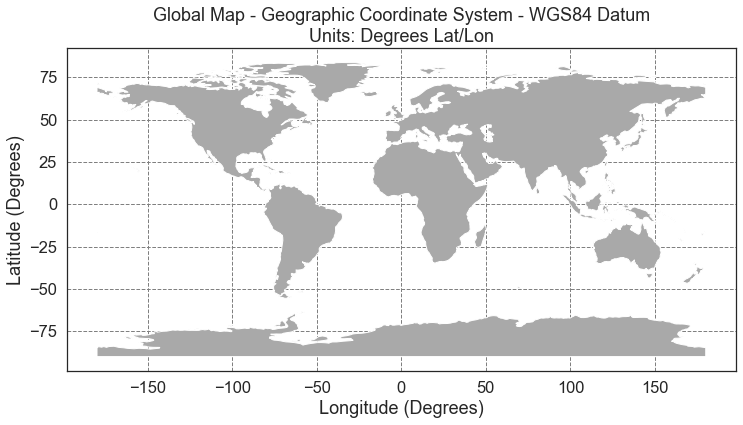

In [5]:
fig, ax = plt.subplots(figsize=(12,12))

worldBound.plot(color='darkgrey',
                ax=ax)

ax.set(xlabel='Longitude (Degrees)',
       ylabel='Latitude (Degrees)',
       title='Global Map - Geographic Coordinate System - WGS84 Datum\nUnits: Degrees Lat/Lon')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray',
              linestyle='dashed')
ax.xaxis.grid(color='gray',
              linestyle='dashed')

#### Create Spatial Points Object

1. Create a numpy array of the point locations

In [6]:
city_points = np.array([[-105.2519, 40.0274],
                        [  10.75,   59.95],
                        [   2.9833, 39.6167]])

2. Turn points into a list of x,y shapely points

In [7]:
city_locations = [Point(xy) for xy in city_points]
city_locations

In [8]:
type(city_locations)

list

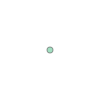

In [9]:
city_locations[0]

In [10]:
type(city_locations)

list

In [11]:
dir(city_locations[0])

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'ha

In [12]:
city_locations[0].x

-105.2519

3. Create geodataframe using the points

In [13]:
city_locations = gpd.GeoDataFrame(city_locations,
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head()

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


4. Plot points on top of world map

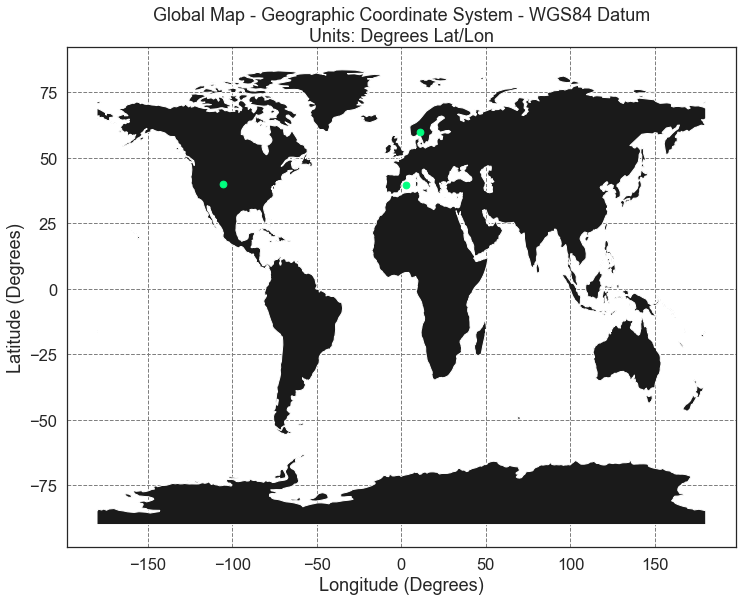

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

worldBound.plot(color='k',
                ax=ax)
city_locations.plot(ax=ax,
                    color='springgreen',
                    markersize=45)

ax.set(xlabel='Longitude (Degrees)',
       ylabel='Latitude (Degrees)',
       title='Global Map - Geographic Coordinate System - WGS84 Datum\nUnits: Degrees Lat/Lon')
ax.set_axisbelow(True)
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.yaxis.grid(color='grey', linestyle='dashed')

Import proper graticules that can be projected onto a particular coordinate system

In [15]:
graticule_path = os.path.join(os.path.expanduser('~'),
                              'earth-analytics',
                              'data',
                              'spatial-vector-lidar',
                              'global',
                              'ne_110m_graticules_all',
                              'ne_110m_graticules_15.shp')
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join(os.path.expanduser('~'),
                         'earth-analytics',
                         'data',
                         'spatial-vector-lidar',
                         'global',
                         'ne_110m_graticules_all',
                         'ne_110m_wgs84_bounding_box.shp')
bbox = gpd.read_file(bbox_path)

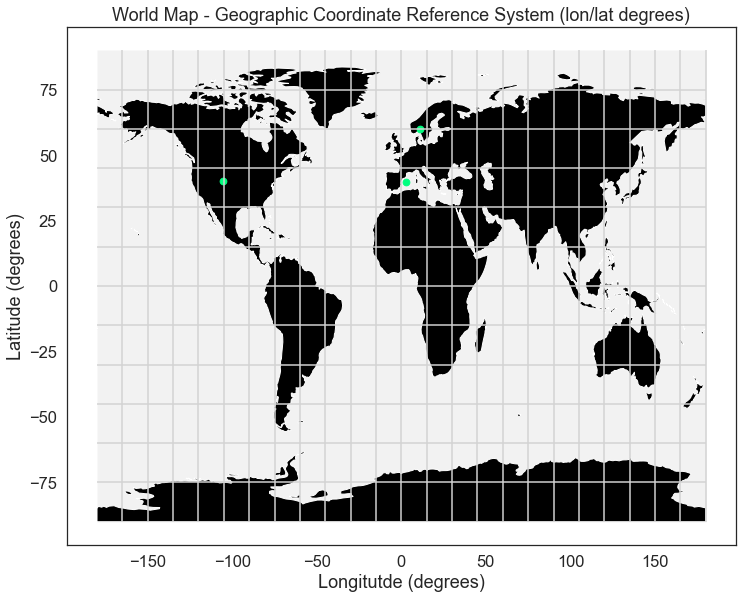

In [16]:
fig, ax = plt.subplots(figsize=(12,12))

bbox.plot(ax=ax, alpha=0.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')
city_locations.plot(ax=ax,
                    markersize=45,
                    color='springgreen')
ax.set(title='World Map - Geographic Coordinate Reference System (lon/lat degrees)',
       xlabel='Longitutde (degrees)',
       ylabel='Latitude (degrees)')
plt.show()

#### Geographic vs. projected coordinate systems

Latitude and longitude are not ideal for measuring distance - need to use a projected system

Reproject into Robinson

In [17]:
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

Plot again

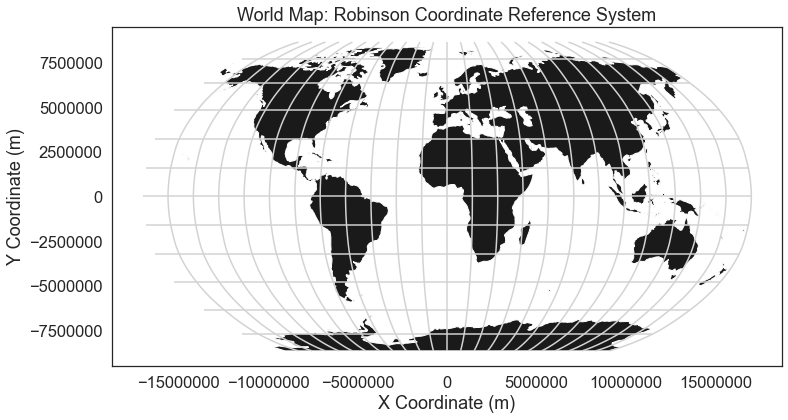

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax,
                     color='lightgrey')

ax.set(title='World Map: Robinson Coordinate Reference System',
       xlabel='X Coordinate (m)',
       ylabel='Y Coordinate (m)')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

What happens if you add the same Lat/Lon coordinate locations (cities) that were used above?

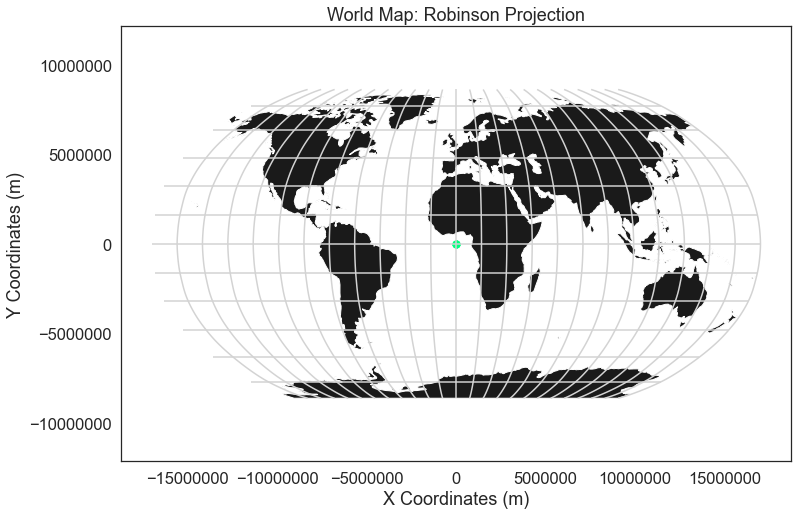

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax,
                     color='lightgrey')
city_locations.plot(ax=ax,
                    color='springgreen',
                    markersize=50)

ax.set(title='World Map: Robinson Projection',
       xlabel='X Coordinates (m)',
       ylabel='Y Coordinates (m)')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal')
plt.show()
       

Cities are in wrong location. Need to reproject using .to_crs

In [23]:
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

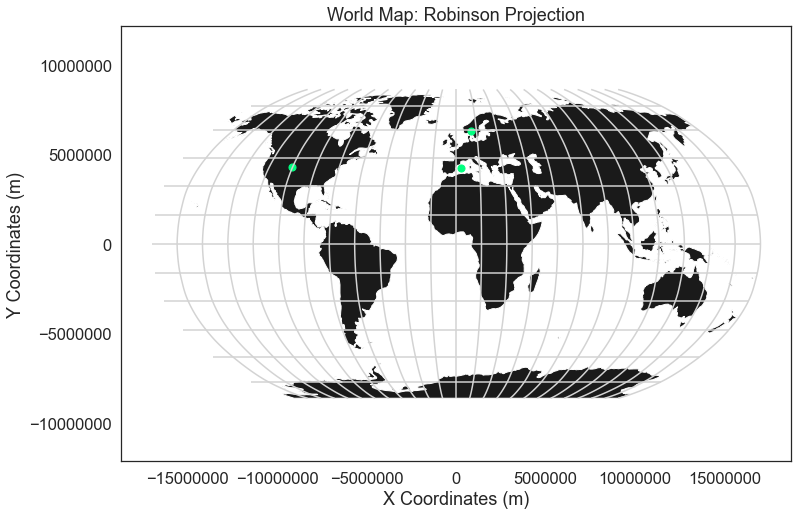

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax,
                     color='lightgrey')
city_locations_robin.plot(ax=ax,
                          color='springgreen',
                        markersize=50)

ax.set(title='World Map: Robinson Projection',
       xlabel='X Coordinates (m)',
       ylabel='Y Coordinates (m)')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal')
plt.show()

Reproject graticules and bounding box to Robinson. Remember, both the graticules and bounding box are shapefiles.

In [25]:
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

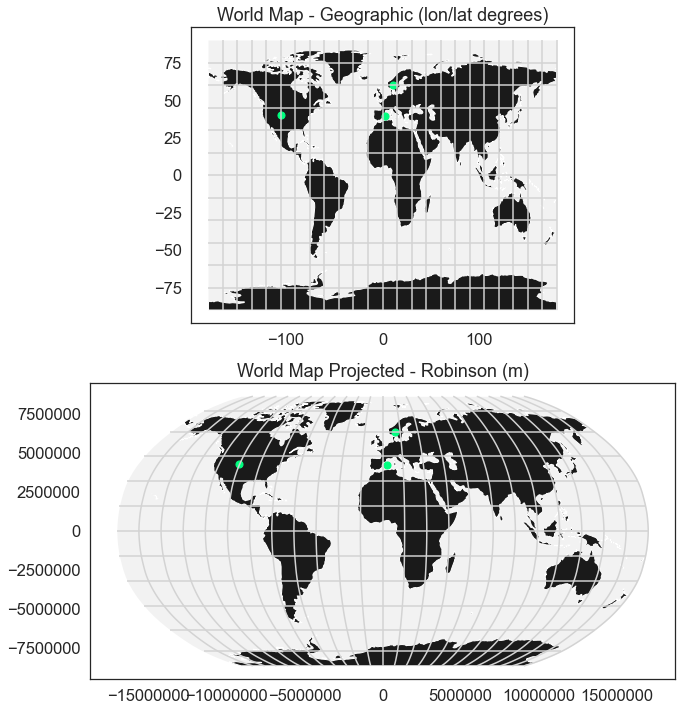

In [28]:
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(13,12))

# Plot WGS 84 EPSG:4326 projection
bbox.plot(ax=ax0,
          alpha=0.1,
          color='grey')
graticule.plot(ax=ax0,
                color='lightgrey')
worldBound.plot(ax=ax0,
                color='k')
city_locations.plot(ax=ax0,
                    color='springgreen',
                    markersize=50)
ax0.set(title='World Map - Geographic (lon/lat degrees)')

# Robinson plot
bbox_robinson.plot(ax=ax1,
                   alpha=0.1,
                   color='grey')
graticule_robin.plot(ax=ax1,
                     color='lightgrey')
worldBound_robin.plot(ax=ax1,
                      color='k')
city_locations_robin.plot(ax=ax1,
                          color='springgreen',
                          markersize=50)
ax1.set(title='World Map Projected - Robinson (m)')

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)